
[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
/var/folders/ng/5883tls546s98nnlzzj3v7yh0000gr/T/ipykernel_20405/4066143608.py:7: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('BaseFilewPopulation.csv')
/var/folders/ng/5883tls546s98nnlzzj3v7yh0000gr/T/ipykernel_20405/4066143608.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['month_year'] = pd.to_datetime(df['month_year'])
/var/folders/ng/5883tls546s98nnlzzj3v7yh0000gr/T/ipykernel_20405/4066143608.py:23: FutureWarning: 'M' is deprecated and will be removed in a fu

Prophet Forecasted Values:
            ds          yhat    yhat_lower    yhat_upper
60  2024-01-31  1.495117e+06  1.338678e+06  1.654180e+06
61  2024-02-29  1.492330e+06  1.319562e+06  1.653421e+06
62  2024-03-31  1.891080e+06  1.727852e+06  2.054950e+06
63  2024-04-30  1.193316e+06  1.024230e+06  1.359537e+06
64  2024-05-31  9.417146e+05  7.871593e+05  1.115234e+06
65  2024-06-30  1.377915e+06  1.226106e+06  1.533530e+06
66  2024-07-31  1.544750e+06  1.378897e+06  1.711197e+06
67  2024-08-31  1.514559e+06  1.351033e+06  1.671823e+06
68  2024-09-30  1.502898e+06  1.337238e+06  1.665397e+06
69  2024-10-31  1.531730e+06  1.369719e+06  1.685366e+06
70  2024-11-30  1.762635e+06  1.589704e+06  1.933145e+06
71  2024-12-31  1.637072e+06  1.461595e+06  1.799642e+06
72  2025-01-31  1.484377e+06  1.329327e+06  1.650740e+06
73  2025-02-28  1.582947e+06  1.419639e+06  1.756393e+06
74  2025-03-31  1.871233e+06  1.711581e+06  2.040296e+06
75  2025-04-30  1.394180e+06  1.228374e+06  1.566494e+06
76  

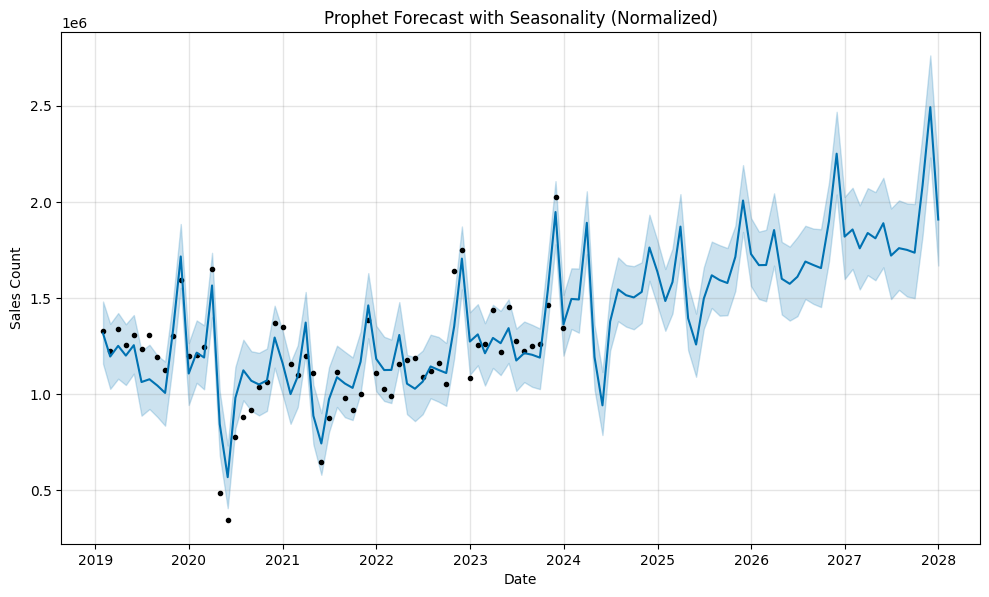

In [1]:
!pip install prophet
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

df = pd.read_csv('BaseFilewPopulation.csv')
df['month_year'] = pd.to_datetime(df['month_year'])

df['Vehicle Count'] = pd.to_numeric(df['Vehicle Count'], errors='coerce')

avg_sales = df[((df['month_year'].dt.year == 2020) & (df['month_year'].dt.month.isin([2, 3, 6, 7]))) |
               ((df['month_year'].dt.year == 2021) & (df['month_year'].dt.month.isin([2, 3, 6, 7])))]['Vehicle Count'].mean()

df.loc[(df['month_year'].dt.year.isin([2020, 2021])) & (df['month_year'].dt.month.isin([4, 5])), 'Vehicle Count'] = avg_sales


monthly_sales_normalized = df.groupby(pd.Grouper(key='month_year', freq='M'))['Vehicle Count'].sum().reset_index()


prophet_df = monthly_sales_normalized.rename(columns={'month_year': 'ds', 'Vehicle Count': 'y'})


model = Prophet(seasonality_mode='additive')  # Additive seasonality (default)


model.fit(prophet_df)

future = model.make_future_dataframe(periods=48, freq='M') 

forecast = model.predict(future)

print("Prophet Forecasted Values:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(48))

fig = model.plot(forecast)
plt.title('Prophet Forecast with Seasonality (Normalized)')
plt.xlabel('Date')
plt.ylabel('Sales Count')
plt.grid(True)
plt.show()


/var/folders/ng/5883tls546s98nnlzzj3v7yh0000gr/T/ipykernel_20405/1432995390.py:5: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('BaseFilewPopulation.csv')
/var/folders/ng/5883tls546s98nnlzzj3v7yh0000gr/T/ipykernel_20405/1432995390.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['month_year'] = pd.to_datetime(df['month_year'])
/var/folders/ng/5883tls546s98nnlzzj3v7yh0000gr/T/ipykernel_20405/1432995390.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_normalized = df.groupby(pd.Grouper(key='month_year', freq='M'))['Vehicle Count'].sum().reset_index()
14:13:43 - cmdstanpy - INFO - Chain [1] start processing
14:13:43 - cmdstanpy - INFO - Chain [1] done processing
/opt/homebrew/lib/python3.11/site-pack

Prophet Forecasted Values for Test Period:
           ds          yhat    yhat_lower    yhat_upper
48 2023-01-31  1.185154e+06  9.849019e+05  1.370615e+06
49 2023-02-28  1.047318e+06  8.528751e+05  1.234606e+06
50 2023-03-31  1.061604e+06  8.721596e+05  1.251771e+06
51 2023-04-30  1.163578e+06  9.698764e+05  1.360698e+06
52 2023-05-31  1.120893e+06  9.267704e+05  1.310843e+06
53 2023-06-30  9.430829e+05  7.455039e+05  1.164353e+06
54 2023-07-31  1.031863e+06  8.270316e+05  1.240385e+06
55 2023-08-31  9.813861e+05  7.773003e+05  1.170984e+06
56 2023-09-30  9.293816e+05  7.347458e+05  1.110174e+06
57 2023-10-31  1.373863e+06  1.181193e+06  1.554213e+06
58 2023-11-30  1.666280e+06  1.479069e+06  1.866376e+06
59 2023-12-31  1.147735e+06  9.457947e+05  1.333697e+06

Evaluation Metrics:
Mean Squared Error (MSE): 67753688983.08044
Mean Absolute Error (MAE): 235091.68669409506
R-squared (R2) Score: -0.47047966344154313


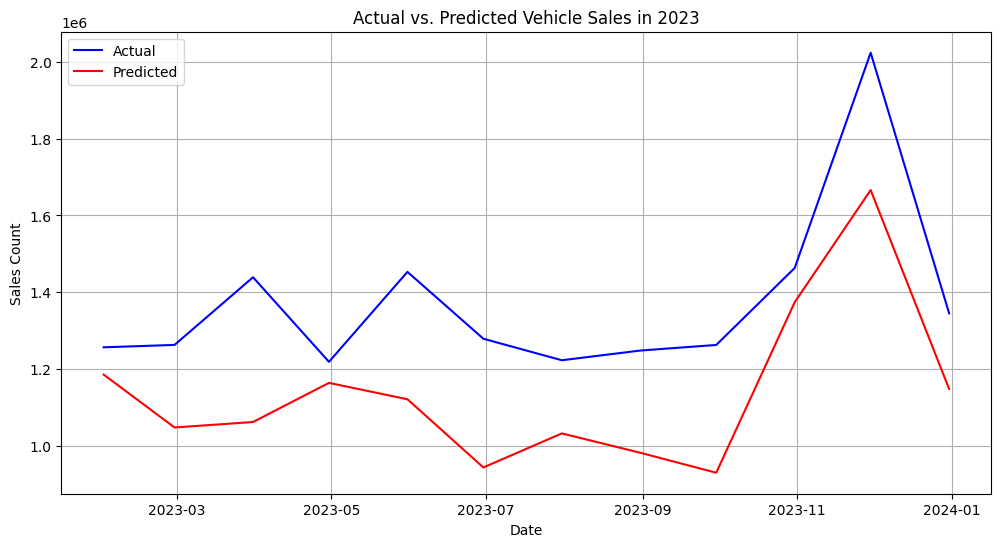

In [4]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
df = pd.read_csv('BaseFilewPopulation.csv')
df['month_year'] = pd.to_datetime(df['month_year'])

df['Vehicle Count'] = pd.to_numeric(df['Vehicle Count'], errors='coerce')

avg_sales = df[((df['month_year'].dt.year == 2020) & (df['month_year'].dt.month.isin([2, 3, 6, 7]))) |
               ((df['month_year'].dt.year == 2021) & (df['month_year'].dt.month.isin([2, 3, 6, 7])))]['Vehicle Count'].mean()

df.loc[(df['month_year'].dt.year.isin([2020, 2021])) & (df['month_year'].dt.month.isin([4, 5])), 'Vehicle Count'] = avg_sales


monthly_sales_normalized = df.groupby(pd.Grouper(key='month_year', freq='M'))['Vehicle Count'].sum().reset_index()


prophet_df = monthly_sales_normalized.rename(columns={'month_year': 'ds', 'Vehicle Count': 'y'})

# Assuming you already have the necessary data loaded and preprocessed
# Splitting data before and after 2022 for train and test sets
train = prophet_df[prophet_df['ds'] < '2023-01-01']
test = prophet_df[prophet_df['ds'] >= '2023-01-01']

# Initialize and fit the Prophet model using the train data
model = Prophet(seasonality_mode='additive')
model.fit(train)

# Make predictions for the test data
future = model.make_future_dataframe(periods=len(test), freq='M')
forecast = model.predict(future)

# Print the forecasted values for the test period
print("Prophet Forecasted Values for Test Period:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(len(test)))

# Evaluate the model's performance
y_true = test['y'].values
y_pred = forecast[-len(test):]['yhat'].values

# Calculate evaluation metrics
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")

# Plotting actual and predicted values for 2023
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], test['y'], label='Actual', color='blue')
plt.plot(test['ds'], forecast[-len(test):]['yhat'], label='Predicted', color='red')
plt.title('Actual vs. Predicted Vehicle Sales in 2023')
plt.xlabel('Date')
plt.ylabel('Sales Count')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/ng/5883tls546s98nnlzzj3v7yh0000gr/T/ipykernel_20405/3917992161.py:5: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('BaseFilewPopulation.csv')
/var/folders/ng/5883tls546s98nnlzzj3v7yh0000gr/T/ipykernel_20405/3917992161.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['month_year'] = pd.to_datetime(df['month_year'])
/var/folders/ng/5883tls546s98nnlzzj3v7yh0000gr/T/ipykernel_20405/3917992161.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_normalized = df.groupby(pd.Grouper(key='month_year', freq='M'))['Vehicle Count'].sum().reset_index()
14:16:29 - cmdstanpy - INFO - Chain [1] start processing
14:16:29 - cmdstanpy - INFO - Chain [1] done processing
/opt/homebrew/lib/python3.11/site-pack

Prophet Forecasted Values for Test Period:
           ds          yhat    yhat_lower    yhat_upper
48 2023-01-31  1.185154e+06  9.937076e+05  1.388557e+06
49 2023-02-28  1.047318e+06  8.546943e+05  1.242344e+06
50 2023-03-31  1.061604e+06  8.690155e+05  1.258364e+06
51 2023-04-30  1.163578e+06  9.704171e+05  1.357347e+06
52 2023-05-31  1.120893e+06  9.201733e+05  1.322518e+06
53 2023-06-30  9.430829e+05  7.498203e+05  1.124547e+06
54 2023-07-31  1.031863e+06  8.525300e+05  1.230638e+06
55 2023-08-31  9.813861e+05  8.007156e+05  1.172998e+06
56 2023-09-30  9.293816e+05  7.258588e+05  1.132888e+06
57 2023-10-31  1.373863e+06  1.177179e+06  1.566753e+06
58 2023-11-30  1.666280e+06  1.468102e+06  1.856151e+06
59 2023-12-31  1.147735e+06  9.407089e+05  1.344097e+06

Evaluation Metrics:
Mean Squared Error (MSE): 67753688983.08044
Mean Absolute Error (MAE): 235091.68669409506
R-squared (R2) Score: -0.47047966344154313


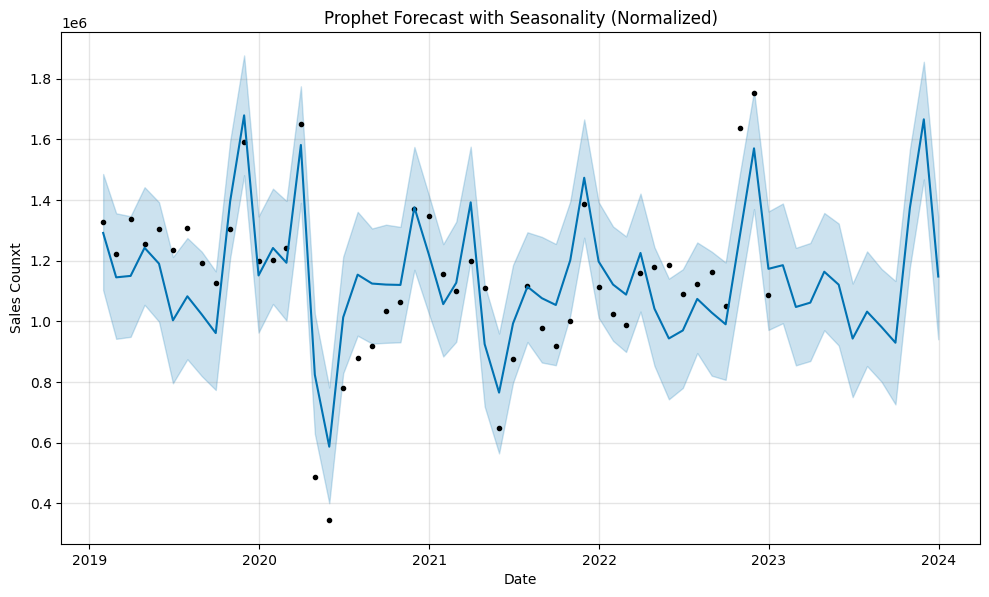

In [5]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
df = pd.read_csv('BaseFilewPopulation.csv')
df['month_year'] = pd.to_datetime(df['month_year'])

df['Vehicle Count'] = pd.to_numeric(df['Vehicle Count'], errors='coerce')

avg_sales = df[((df['month_year'].dt.year == 2020) & (df['month_year'].dt.month.isin([2, 3, 6, 7]))) |
               ((df['month_year'].dt.year == 2021) & (df['month_year'].dt.month.isin([2, 3, 6, 7])))]['Vehicle Count'].mean()

df.loc[(df['month_year'].dt.year.isin([2020, 2021])) & (df['month_year'].dt.month.isin([4, 5])), 'Vehicle Count'] = avg_sales


monthly_sales_normalized = df.groupby(pd.Grouper(key='month_year', freq='M'))['Vehicle Count'].sum().reset_index()


prophet_df = monthly_sales_normalized.rename(columns={'month_year': 'ds', 'Vehicle Count': 'y'})

# Assuming you already have the necessary data loaded and preprocessed
# Splitting data before and after 2022 for train and test sets
train = prophet_df[prophet_df['ds'] < '2023-01-01']
test = prophet_df[prophet_df['ds'] >= '2023-01-01']

# Initialize and fit the Prophet model using the train data
model = Prophet(seasonality_mode='additive')
model.fit(train)

# Make predictions for the test data
future = model.make_future_dataframe(periods=len(test), freq='M')
forecast = model.predict(future)

# Print the forecasted values for the test period
print("Prophet Forecasted Values for Test Period:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(len(test)))

# Evaluate the model's performance
y_true = test['y'].values
y_pred = forecast[-len(test):]['yhat'].values

# Calculate evaluation metrics
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")

# Plot the forecast and actual values
fig = model.plot(forecast)
plt.title('Prophet Forecast with Seasonality (Normalized)')
plt.xlabel('Date')
plt.ylabel('Sales Counxt')
plt.grid(True)
plt.show()


In [6]:
# Calculate the accuracy score (1 - mean absolute percentage error)
accuracy = 1 - (mae / test['y'].mean())

print(f"\nAccuracy Score: {accuracy}")



Accuracy Score: 0.8287464753999416


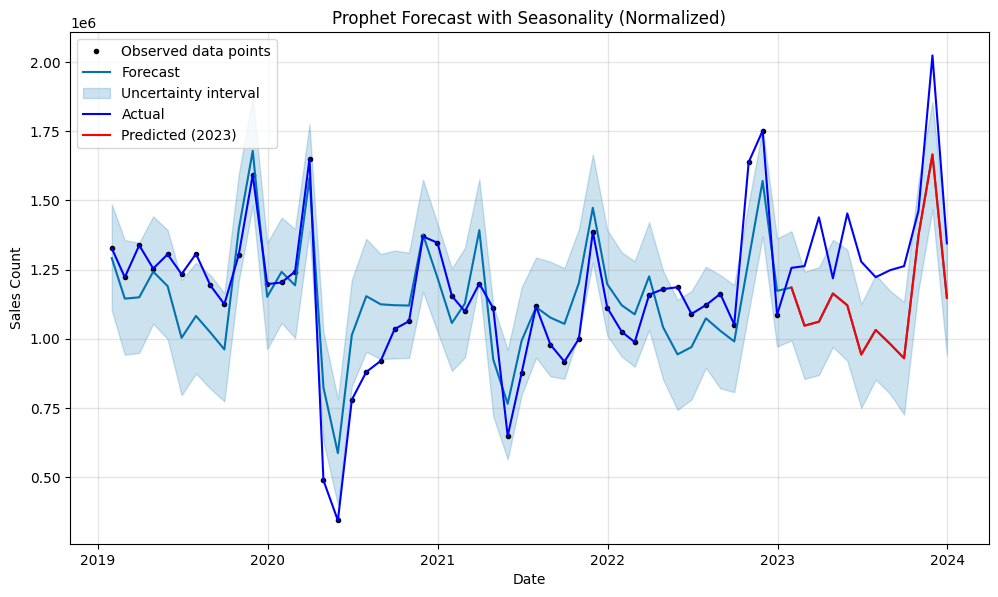

In [7]:
fig = model.plot(forecast)
plt.title('Prophet Forecast with Seasonality (Normalized)')
plt.xlabel('Date')
plt.ylabel('Sales Count')
plt.grid(True)

# Plot entire actual data
plt.plot(prophet_df['ds'], prophet_df['y'], label='Actual', color='blue')

# Plot predicted values for 2023 with a different color
plt.plot(forecast['ds'][-len(test):], forecast['yhat'][-len(test):], label='Predicted (2023)', color='red')

plt.legend()
plt.show()

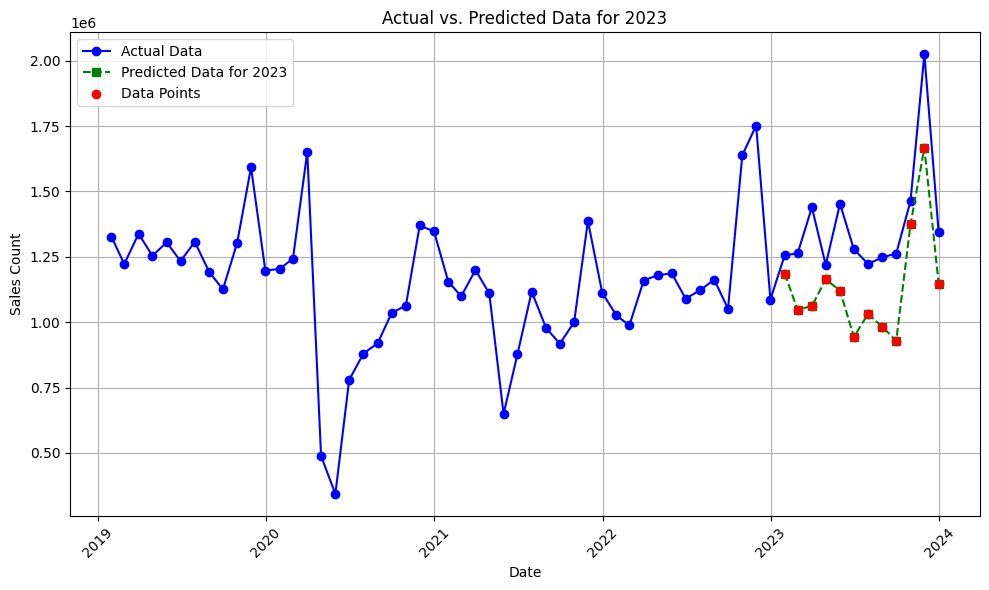

In [8]:
# Plotting actual data
plt.figure(figsize=(10, 6))
plt.plot(prophet_df['ds'], prophet_df['y'], label='Actual Data', marker='o', linestyle='-', color='blue')

# Plotting predicted data for 2023
plt.plot(test['ds'], y_pred, label='Predicted Data for 2023', marker='s', linestyle='--', color='green')

# Plotting data points (dots) for better visualization
plt.scatter(test['ds'], y_pred, color='red', label='Data Points', zorder=5)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Sales Count')
plt.title('Actual vs. Predicted Data for 2023')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/ng/5883tls546s98nnlzzj3v7yh0000gr/T/ipykernel_20405/4169883407.py:5: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('BaseFilewPopulation.csv')
/var/folders/ng/5883tls546s98nnlzzj3v7yh0000gr/T/ipykernel_20405/4169883407.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['month_year'] = pd.to_datetime(df['month_year'])
/var/folders/ng/5883tls546s98nnlzzj3v7yh0000gr/T/ipykernel_20405/4169883407.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_sum = df.groupby(pd.Grouper(key='month_year', freq='M'))['Vehicle Count'].sum().reset_index()
16:01:10 - cmdstanpy - INFO - Chain [1] start processing
16:01:10 - cmdstanpy - INFO - Chain [1] done processing
/opt/homebrew/lib/python3.11/site-packages/pr

Prophet Forecasted Values for Test Period:
           ds          yhat    yhat_lower    yhat_upper
48 2023-01-31  1.228316e+06  1.093888e+06  1.373083e+06
49 2023-02-28  1.189157e+06  1.056311e+06  1.330829e+06
50 2023-03-31  1.249671e+06  1.121884e+06  1.388808e+06
51 2023-04-30  1.258026e+06  1.129792e+06  1.390325e+06
52 2023-05-31  1.245912e+06  1.105038e+06  1.379646e+06
53 2023-06-30  1.158612e+06  1.017650e+06  1.288713e+06
54 2023-07-31  1.201830e+06  1.072589e+06  1.345476e+06
55 2023-08-31  1.106252e+06  9.819453e+05  1.240701e+06
56 2023-09-30  1.007926e+06  8.737902e+05  1.136042e+06
57 2023-10-31  1.418425e+06  1.288332e+06  1.557478e+06
58 2023-11-30  1.700886e+06  1.556864e+06  1.827109e+06
59 2023-12-31  1.200179e+06  1.068003e+06  1.329940e+06

Evaluation Metrics:
Mean Squared Error (MSE): 26138372140.081528
Mean Absolute Error (MAE): 132264.97337795736
R-squared (R2) Score: 0.4327106723730544


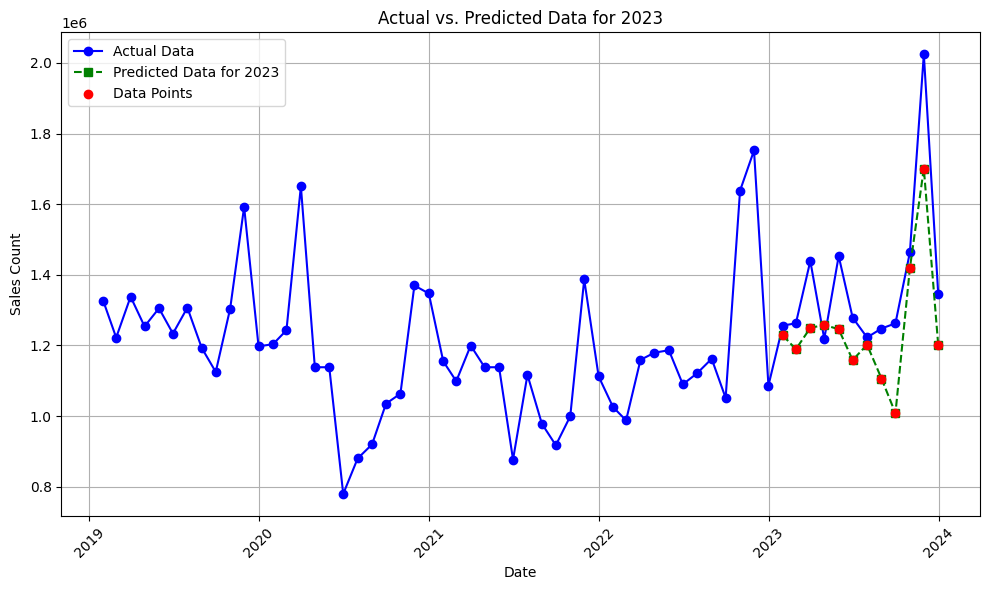

In [23]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
df = pd.read_csv('BaseFilewPopulation.csv')
df['month_year'] = pd.to_datetime(df['month_year'])

df['Vehicle Count'] = pd.to_numeric(df['Vehicle Count'], errors='coerce')

monthly_sales_sum = df.groupby(pd.Grouper(key='month_year', freq='M'))['Vehicle Count'].sum().reset_index()

# Normalize monthly sales
monthly_sales_normalized = monthly_sales_sum.copy()
# Calculate the average normalized sales for April and May of 2020 and 2021 separately
avg_sales_2020_april_may = monthly_sales_normalized[((monthly_sales_normalized['month_year'].dt.year == 2020) & (monthly_sales_normalized['month_year'].dt.month.isin([2,3,6,7])))]['Vehicle Count'].mean()

avg_sales_2021_april_may = monthly_sales_normalized[((monthly_sales_normalized['month_year'].dt.year == 2021) & (monthly_sales_normalized['month_year'].dt.month.isin([2,3,6,7])))]['Vehicle Count'].mean()



# Assign the averaged normalized values to April and May for 2020 and 2021 in monthly_sales_normalized
monthly_sales_normalized.loc[(monthly_sales_normalized['month_year'].dt.year.isin([2020, 2021])) & 
                             (monthly_sales_normalized['month_year'].dt.month.isin([4])), 'Vehicle Count'] = avg_sales_2020_april_may
monthly_sales_normalized.loc[(monthly_sales_normalized['month_year'].dt.year.isin([2020, 2021])) & 
                              (monthly_sales_normalized['month_year'].dt.month.isin([5])), 'Vehicle Count'] = avg_sales_2021_april_may 
prophet_df = monthly_sales_normalized.rename(columns={'month_year': 'ds', 'Vehicle Count': 'y'})

# Assuming you already have the necessary data loaded and preprocessed
# Splitting data before and after 2022 for train and test sets
train = prophet_df[prophet_df['ds'] < '2023-01-01']
test = prophet_df[prophet_df['ds'] >= '2023-01-01']

# Initialize and fit the Prophet model using the train data
model = Prophet(seasonality_mode='additive')
model.fit(train)

# Make predictions for the test data
future = model.make_future_dataframe(periods=len(test), freq='M')
forecast = model.predict(future)

# Print the forecasted values for the test period
print("Prophet Forecasted Values for Test Period:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(len(test)))

# Evaluate the model's performance
y_true = test['y'].values
y_pred = forecast[-len(test):]['yhat'].values

# Calculate evaluation metrics
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")

# Plotting actual data
plt.figure(figsize=(10, 6))
plt.plot(prophet_df['ds'], prophet_df['y'], label='Actual Data', marker='o', linestyle='-', color='blue')

# Plotting predicted data for 2023
plt.plot(test['ds'], y_pred, label='Predicted Data for 2023', marker='s', linestyle='--', color='green')

# Plotting data points (dots) for better visualization
plt.scatter(test['ds'], y_pred, color='red', label='Data Points', zorder=5)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Sales Count')
plt.title('Actual vs. Predicted Data for 2023')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
print(avg_sales_2020_april_may )


1138242.75


In [26]:
print(monthly_sales_normalized)

   month_year  Vehicle Count
0  2019-01-31     1326866.00
1  2019-02-28     1222226.00
2  2019-03-31     1337944.00
3  2019-04-30     1253804.00
4  2019-05-31     1305163.00
5  2019-06-30     1233599.00
6  2019-07-31     1306929.00
7  2019-08-31     1192612.00
8  2019-09-30     1124972.00
9  2019-10-31     1304211.00
10 2019-11-30     1592327.00
11 2019-12-31     1197424.00
12 2020-01-31     1203449.00
13 2020-02-29     1242956.00
14 2020-03-31     1650613.00
15 2020-04-30     1138242.75
16 2020-05-31     1138242.75
17 2020-06-30      779549.00
18 2020-07-31      879853.00
19 2020-08-31      919867.00
20 2020-09-30     1035088.00
21 2020-10-31     1063424.00
22 2020-11-30     1369700.00
23 2020-12-31     1347058.00
24 2021-01-31     1155018.00
25 2021-02-28     1098719.00
26 2021-03-31     1199608.00
27 2021-04-30     1138242.75
28 2021-05-31     1138242.75
29 2021-06-30      876798.00
30 2021-07-31     1116654.00
31 2021-08-31      978267.00
32 2021-09-30      917370.00
33 2021-10-31 

In [25]:
accuracy = 1 - (mae / test['y'].mean())
print(f"\nAccuracy Score: {accuracy}")


Accuracy Score: 0.9036510257311577
